<h1>Import des librairies</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

<h2>Import des données et vérification des champs</h2>

In [2]:
# Charger les données
train_data = pd.read_csv("cars_data-reg.csv")

# Afficher les 5 premières lignes des données
train_data.head()

,Kilométrage,Année_Fabrication,Puissance,Consommation,Nombre_Portes,Vitesse_Max,Marque,Prix
0,89517,2008,210,82.094399,2,219,1,22902.765158
1,97836,2018,274,16.331939,3,291,1,29512.466062
2,50396,2011,133,29.778738,2,231,2,13029.153685
3,143982,2012,243,41.556940,3,238,1,27292.752562
4,224514,2021,326,87.855383,5,281,2,46817.128341


In [3]:
train_data.describe()

,Kilométrage,Année_Fabrication,Puissance,Consommation,Nombre_Portes,Vitesse_Max,Marque,Prix
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,146302.3380,2011.32600,235.010000,53.614884,3.514000,225.039000,2.000000,32355.779868
std,86102.8942,6.87772,64.058218,27.336137,1.159806,43.022953,0.811578,10368.675552
min,728.0000,2000.00000,125.000000,5.353732,2.000000,150.000000,1.000000,5666.794333
25%,70326.0000,2005.00000,181.000000,29.955260,2.000000,188.000000,1.000000,24671.936893
50%,143958.5000,2011.00000,237.000000,53.356480,4.000000,226.000000,2.000000,32058.370765
75%,223790.2500,2017.00000,288.000000,77.950275,5.000000,262.000000,3.000000,39789.299440
max,299790.0000,2023.00000,349.000000,99.979611,5.000000,300.000000,3.000000,59640.769068


Ici nous regardons les informations sur nos données, nous vérifions les différentes colonnes, si tout semble bon, bon format des données... Via la fonction describe, on récupère des informations sur notre jeu de données qui sont intéressantes, comme vous pouvez le voir plus haut.

Text(0, 0.5, 'Prix')

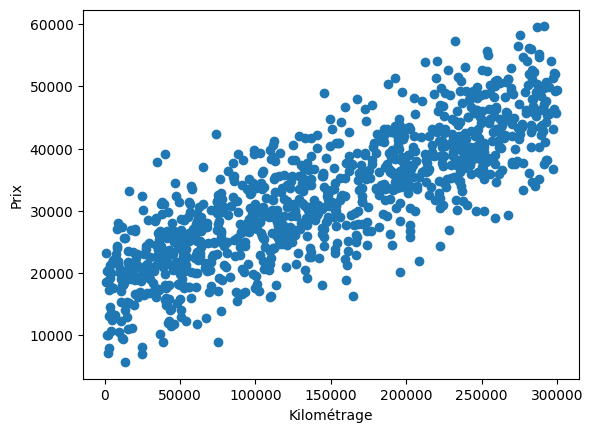

In [13]:
plt.scatter(train_data['Kilométrage'], train_data['Prix'], label='Données')
plt.xlabel('Kilométrage')  # Label pour l'axe X
plt.ylabel('Prix')         # Label pour l'axe Y

<h2>Génération de la matrice de corrélation</h2>

<Axes: >

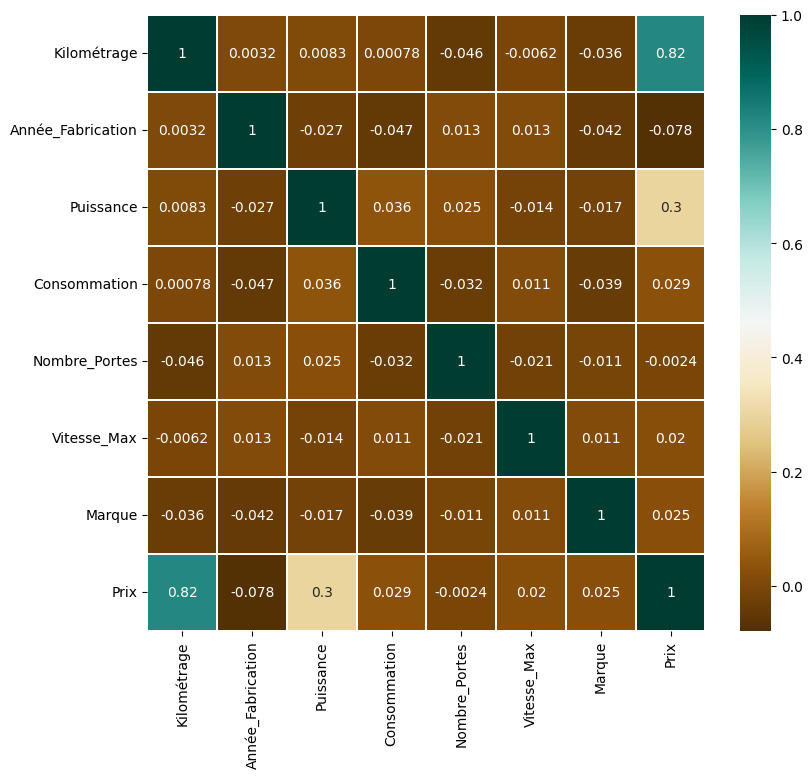

In [4]:
corr_matrix = train_data.corr()
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 8))
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)

<h2>Analyse de la matrice de corrélation</h2>

On a généré une matrice de corrélation pour visualiser les relations entre les différentes caractéristiques de nos données de vente de voiture. On a fait le choix d utiliser la librairie Seaborn pour faciliter l affichage tout en paramètrant le rendu. cela nous permet de mieux voirs les corrélations. 

Selon notre matrice, nous pouvons voir qu'il y a une forte corrélation positive entre le <strong>Kilométrage</strong> et le prix. Nous remarquons également que la deuxième variable qui corrèle le plus avec le prix est la <strong>puissance</strong>

<li><strong>Kilométrage :</strong> Plus une voiture a de kilomètres, plus on peut s'attendre à ce que sa valeur diminue, car cela peut être un indicateur de l'usure générale et de la proximité de la nécessité de remplacer des pièces.</li>

<li><strong>Puissance :</strong> Les voitures avec plus de puissance sont souvent perçues comme plus désirables ou performantes et peuvent donc coûter plus cher.</li>

<h2>Régression linéaire simple</h2>

In [5]:
y = train_data['Prix']
Colonnes = ['Kilométrage', 'Année_Fabrication', 'Puissance', 'Consommation', 'Nombre_Portes', 'Vitesse_Max', 'Marque']

i = 1
for c in Colonnes:
    print('----------------------------------------------------------------------------------------------------\n')
    print('Modèle n°', i)
    X = train_data[c]
    a, b, r, p, _ = stats.linregress(X, y)
    print('Prix = ', a, '*', c, '+', b)
    R2 = r ** 2
    print('      R^2 = ', R2)
    print('          ==> {:2.2%} de la variabilité du prix est expliquée par {}'.format(R2, X.name))
    print('      On teste l\'hypothèse H0 : beta_1 = 0 au risque alpha = 5%')
    print('      p_value = ', p)
    if p < .05 :
        print('On rejette H0 au risque 5%')
        print(c, ' a bien un impact sur le prix')
    else:
        print('On accepte H0')
    print('\n')

----------------------------------------------------------------------------------------------------

Modèle n° 1
Prix =  0.09837917335677196 * Kilométrage + 17962.676795228774
      R^2 =  0.6674139307886546
          ==> 66.74% de la variabilité du prix est expliquée par Kilométrage
      On teste l'hypothèse H0 : beta_1 = 0 au risque alpha = 5%
      p_value =  8.317164806671154e-241
On rejette H0 au risque 5%
Kilométrage  a bien un impact sur le prix


----------------------------------------------------------------------------------------------------

Modèle n° 1
Prix =  -117.94566113801 * Année_Fabrication + 269582.9547019009
      R^2 =  0.006120773394306158
          ==> 0.61% de la variabilité du prix est expliquée par Année_Fabrication
      On teste l'hypothèse H0 : beta_1 = 0 au risque alpha = 5%
      p_value =  0.013334093838274516
On rejette H0 au risque 5%
Année_Fabrication  a bien un impact sur le prix


-----------------------------------------------------------------

<h2>Régression linéaire multiple</h2>

In [6]:
import statsmodels.api as sm

# Supposons que 'train_data' est votre DataFrame et que 'Prix' est votre variable cible.
# Vous devez inclure une colonne de 1s pour le terme constant (intercept) du modèle.
X = train_data[['Kilométrage', 'Année_Fabrication', 'Puissance', 'Consommation', 'Nombre_Portes', 'Vitesse_Max', 'Marque']]  # Variables explicatives
y = train_data['Prix']  # Variable cible

# Ajouter une colonne constante à X pour le terme d'intercept
X = sm.add_constant(X)

# Construire le modèle
model = sm.OLS(y, X)

# Ajuster le modèle de régression multiple
result = model.fit()

# Afficher le résumé des résultats du modèle
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                   Prix   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     459.1
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          5.81e-306
Time:                        23:27:50   Log-Likelihood:                -9942.7
No. Observations:                1000   AIC:                         1.990e+04
Df Residuals:                     992   BIC:                         1.994e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               2.16e+05   4.69e+0

## Supprimer les colonnes inutiles
- Nous pouvons supprimer les colonnes inutiles car ils ne contribuent pas à la classe cible.

In [7]:
train_data = train_data.drop(columns=['Année_Fabrication', 'Consommation', 'Nombre_Portes','Vitesse_Max', 'Marque'])

In [8]:
train_data.head()

,Kilométrage,Puissance,Prix
0,89517,210,22902.765158
1,97836,274,29512.466062
2,50396,133,13029.153685
3,143982,243,27292.752562
4,224514,326,46817.128341


Nous remarquons que nos données pour la régression sont biens selectionnées après la suppression des données qui nous semblent inutiles

In [9]:
X = train_data[['Kilométrage', 'Puissance']]  # Variables explicatives
y = train_data['Prix']  # Variable cible

In [10]:
from statsmodels.regression.linear_model import OLS
model = OLS(y, X)
report = model.fit()
report.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Prix   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                          1.925e+04
Date:                Tue, 02 Jan 2024   Prob (F-statistic):                        0.00
Time:                        23:27:50   Log-Likelihood:                         -10013.
No. Observations:                1000   AIC:                                  2.003e+04
Df Residuals:                     998   BIC:                                  2.004e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Kilométrage     0.1058      0.002     58.142      0.000       0.102       0.109
Puissance      70.1466      1.268     55.334      0.000      67.659      72.634
==============================================================================
Omnibus:                        2.708   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.258   Jarque-Bera (JB):                2.573
Skew:                          -0.117   Prob(JB):                        0.276
Kurtosis:                       3.085   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""